In [1]:
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
import linepyline as lpl

In [3]:
atm = xr.open_dataset('afgl_1986-us_standard.nc')

In [4]:
rtm = lpl.rtm()

Loading H2O, CO2, O3, CH4, NH3 line data from /Users/rca/Projects/linepyline/linepyline/HITRAN/HITRAN2024/netcdf
Loading H2O continuum data from /Users/rca/Projects/linepyline/linepyline/MT_CKD/MT_CKD_H2O-4.3/data


In [5]:
p = atm.p # pressure coordinate, must be in Pa and ordered by increasing p
ps = p.isel(p=-1) # surface pressure
T = atm.t # atmospheric temperature, must be in K
Ts = T.isel(p=-1) # surface (skin) temperature

# concentration of radiatively active species (must be molar fraction, units ppv)
# try with water vapor only
absorbers = {'H2O' : atm.x_H2O}

# transparent background gas mixed in with absorbers
background_gas = 'air'

#spectral resolution and range(cm-1) 
dnu = 0.1 
nu_min = dnu
nu_max = 2000

# line profile to use
line_shape = 'pseudovoigt'

In [6]:
%time ds = rtm.radiative_transfer(nu_min, nu_max, dnu, p, ps, T, Ts, absorbers=absorbers, background_gas=background_gas, line_shape=line_shape)

CPU times: user 6.07 s, sys: 293 ms, total: 6.37 s
Wall time: 4.61 s


In [7]:
# make a spectrally-coarsend version of the output (averages over blocks of width in cm-1)
ds_coarse = rtm.coarsen(ds, dnu, width=10)

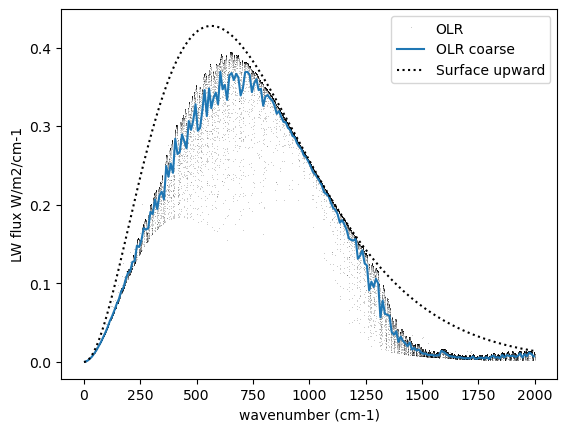

In [8]:
plt.plot(ds.nu, ds.olr, 'k,', alpha=0.2, label='OLR')
plt.plot(ds_coarse.nu, ds_coarse.olr, label='OLR coarse')
plt.plot(ds.nu, ds.lw_up_srf, 'k:', label='Surface upward')
plt.legend()
plt.gca().set_xlabel('wavenumber (cm-1)')
plt.gca().set_ylabel('LW flux W/m2/cm-1');
plt.savefig('h2o_only.svg')

In [9]:
# try it again, including CO2
# if concentration given as scalar, will be assumed uniform (well mixed) through column
absorbers = {'H2O' : atm.x_H2O,
             'CO2' : 400*1.e-6}

%time ds = rtm.radiative_transfer(nu_min, nu_max, dnu, p, ps, T, Ts, absorbers=absorbers, background_gas=background_gas, line_shape=line_shape)
ds_coarse = rtm.coarsen(ds, dnu, width=10)

CPU times: user 6 s, sys: 147 ms, total: 6.15 s
Wall time: 1 s


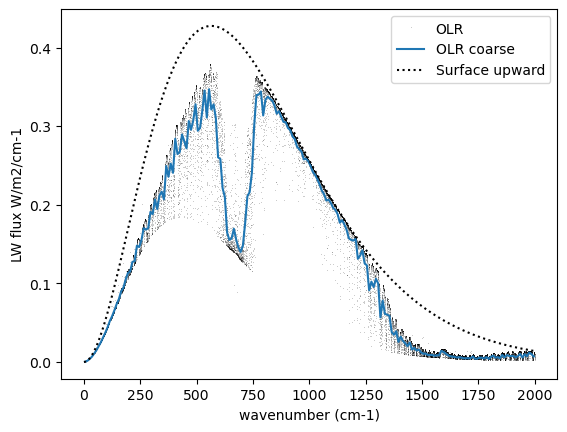

In [10]:
plt.plot(ds.nu, ds.olr, 'k,', alpha=0.2, label='OLR')
plt.plot(ds_coarse.nu, ds_coarse.olr, label='OLR coarse')
plt.plot(ds.nu, ds.lw_up_srf, 'k:', label='Surface upward')
plt.legend()
plt.gca().set_xlabel('wavenumber (cm-1)')
plt.gca().set_ylabel('LW flux W/m2/cm-1');
plt.savefig('h2o_co2.svg')